In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [2]:
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
dataset_url = r'E:\Alex the analyst projects\Movies portfolio project\movies.csv'

# df = pd.read_csv(dataset_url,index_col = 0)
df = pd.read_csv(dataset_url)
df = df.dropna()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
for col in df.columns:
    print(f"column {col} has {np.sum(df[col].isnull())} null entries ")


column name has 0 null entries 
column rating has 0 null entries 
column genre has 0 null entries 
column year has 0 null entries 
column released has 0 null entries 
column score has 0 null entries 
column votes has 0 null entries 
column director has 0 null entries 
column writer has 0 null entries 
column star has 0 null entries 
column country has 0 null entries 
column budget has 0 null entries 
column gross has 0 null entries 
column company has 0 null entries 
column runtime has 0 null entries 


In [4]:
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df = df.drop('year', axis =1)



In [5]:
def filter_year(item:str) -> str:
    if item.isnumeric() and len(item) == 4:
        return item
    else:
        return None

my_list = [df['released'][index].split() for index in df.index ]
my_list = ["".join(list(filter(filter_year,entry))) for entry in my_list]
df['year'] = my_list

# df.head(10)
        

In [6]:
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)



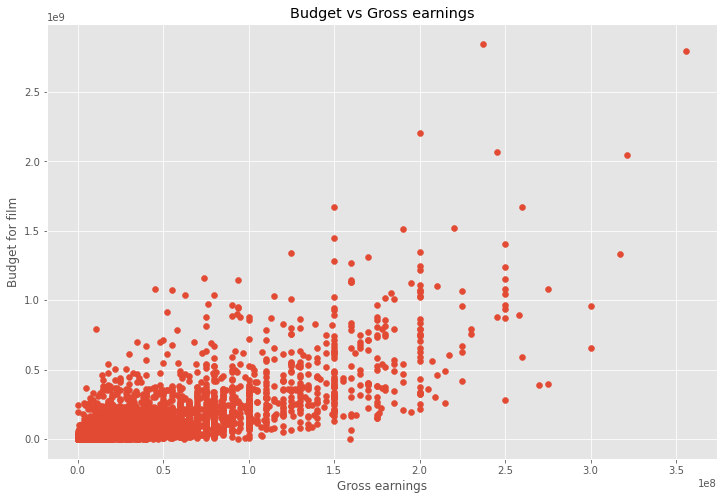

In [7]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross earnings")
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

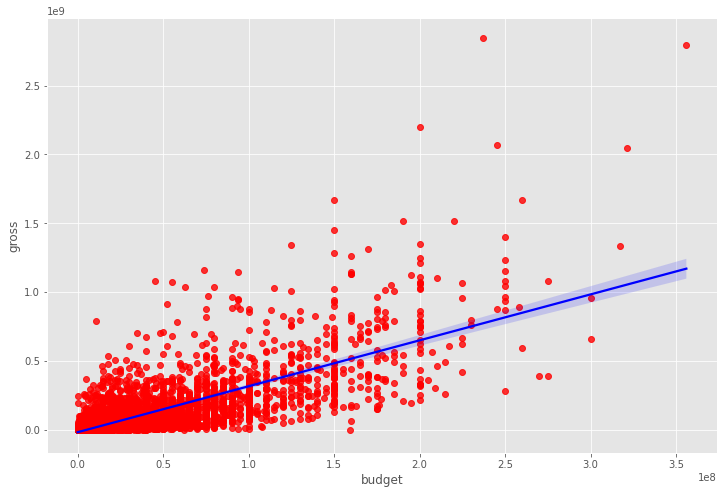

In [8]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'}, line_kws= {'color':'blue'})

In [9]:
correlation_matrix=df.corr(method = 'pearson')
correlation_matrix

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


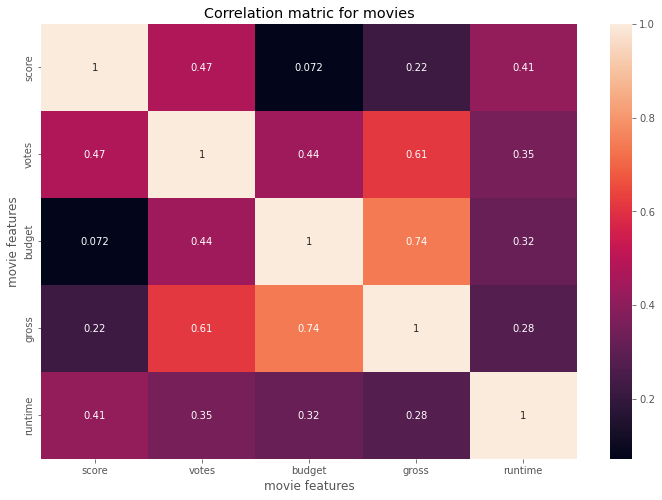

In [10]:
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matric for movies")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

In [11]:
df_categorized = df

for col in df_categorized.columns:
    if df_categorized[col].dtype == 'object':
        df_categorized[col] = df_categorized[col].astype('category')
        df_categorized[col] = df_categorized[col].cat.codes

        
df_categorized       
        

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,386,5,0,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2969,5,0,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1595,3,6,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
272,2909,6,9,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


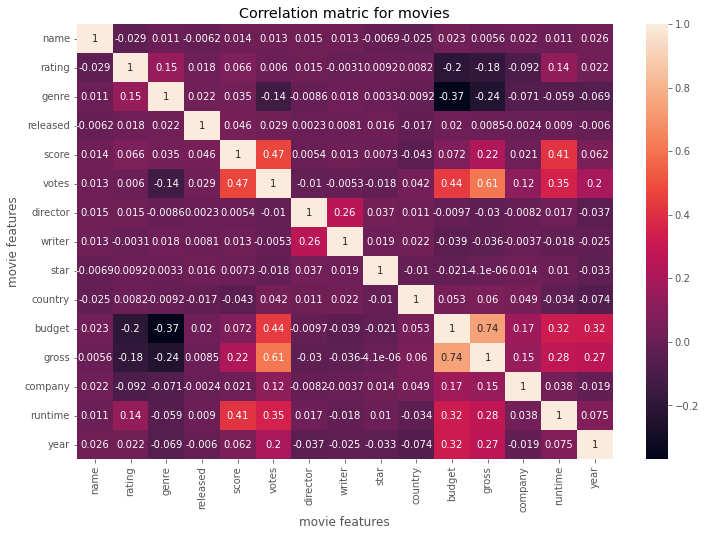

In [12]:
correlation_matrix=df_categorized.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matric for movies")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

In [13]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      released   -0.006152
      score       0.014450
                    ...   
year  budget      0.320312
      gross       0.268721
      company    -0.018806
      runtime     0.075294
      year        1.000000
Length: 225, dtype: float64